# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Kemal Crisannaufal - 1301213133
2. Achmad Fahriza - 1301213006


#### Latar Belakang
Penyakit Parkinson adalah gangguan otak yang menyebabkan gerakan yang tidak diinginkan atau tidak terkendali, seperti gemetar, kekakuan, dan kesulitan dengan keseimbangan dan koordinasi. Penyakit parkinson ini dikenali dari gejala motorik dan non motorik. Gejala klinis utama dari penyakit parkinsons adalah kekakuan, kelambatan gerakan, tremor pada bagian tubuh seperti tangan, dan gangguan keseimbangan dan koordinasi yang terganggu. Parkinsons belum bisa dideteksi melalui tes laboratorium seperti tes darah melainkan dideteksi dari riwayat medis pasien dan pemeriksaan neurologis. Oleh karena itu diperlukan sebuah model yang dapat memprediksi Parkinson atau tingkat keparahan Parkinsons melalui data riwayat medis tersebut.

Pada projek ini, akan dilakukan regresi dalam memprediksi tingkat parkinson pada penderita penyakit parkinson. Dataset yang digunakan dalam regresi kali ini adalah  dataset Parkinson's telemonitoring, yang terdiri dari berbagai pengukuran suara biomedis dari 42 orang dengan penyakit Parkinson tahap awal yang direkam selama enam bulan dari hasil uji coba perangkat pemantauan jarak jauh untuk pemantauan gejala yang progresif. Rekaman tersebut direkam secara otomatis diambil di rumah pasien. Pada dataset ini terdiri dari 22 atribut dan 5875 instance. Tujuan utama dari dataset ini untuk memprediksi skor motorik dan total UPDRS ('motor_UPDRS' dan 'total_UPDRS') dari 16 ukuran suara yang telah diperoleh.

Pra-pemrosesan data yang dilakukan meliputi penghapusan nilai outlier, agregasi fitur, feature selection berdasarkan korelasi, dan pensakalaan pada data. Dari hasil pra-pemrosesan data yang dilakukan akan diperoleh variabel independen  yang memberikan dampak yang lebih besar dibandingkan fitur yang tidak terpilih terhadap variabel dependen (variabel yang akan diprediksi) total_UPDRS. Tujuan dari projek ini adalah untuk menemukan model terbaik yang dapat memprediksi total_UPDRS jika diberikan data telemonitoring baru dari hasil pemeriksaan pasien.



In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Fetch Dataset
df = pd.read_csv("https://drive.google.com/uc?id=1va9XHr9AB9Sikl56ej1tgovcUgZrwW65")
df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


Exploratory Data Analysis

In [3]:
# Menampilkan beberapa data dari dataset
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
# Informasi struktur dan tipe data dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [5]:
#Ukuran dataset
df.shape

(5875, 22)

In [6]:
# Statistik dataset
df.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


<Figure size 3200x2800 with 0 Axes>

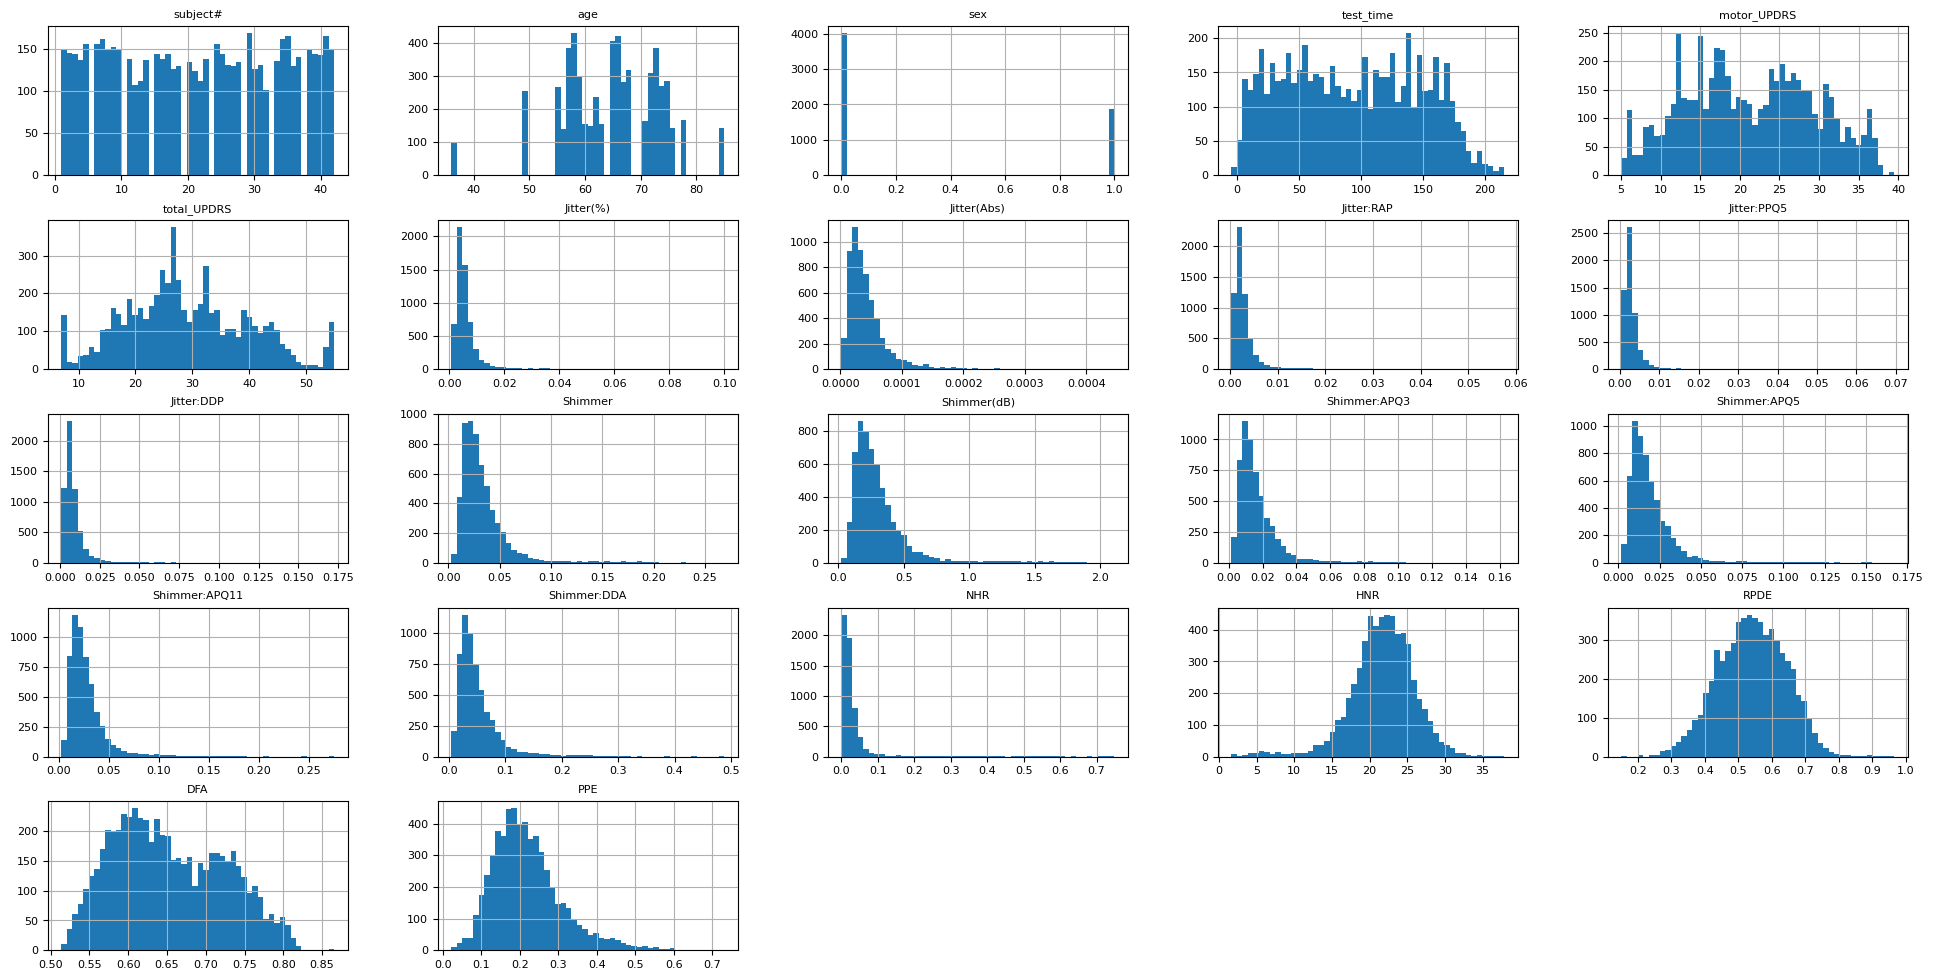

In [7]:
# Histogram setiap atribut

plt.rc('font', size=8)
plt.rc('axes', labelsize=8, titlesize=8)
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

plt.figure(figsize=(32, 28))
df.hist(bins=50, figsize=(24, 12))
plt.show()

In [8]:
#Plot Korelasi untuk setiap atribut terhadap atribut lain
from pandas.plotting import scatter_matrix

attributes = ["age", "test_time", "sex", "motor_UPDRS", "total_UPDRS", "Jitter(%)", "Jitter(Abs)", "Jitter:RAP", "Jitter:PPQ5", "Jitter:DDP",
               "Shimmer","Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","Shimmer:APQ11","Shimmer:DDA","NHR", "HNR","RPDE","DFA","PPE"]
scatter_matrix(df[attributes], figsize=(36, 24), alpha=0.2)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

PRA-PEMROSESAN DATA

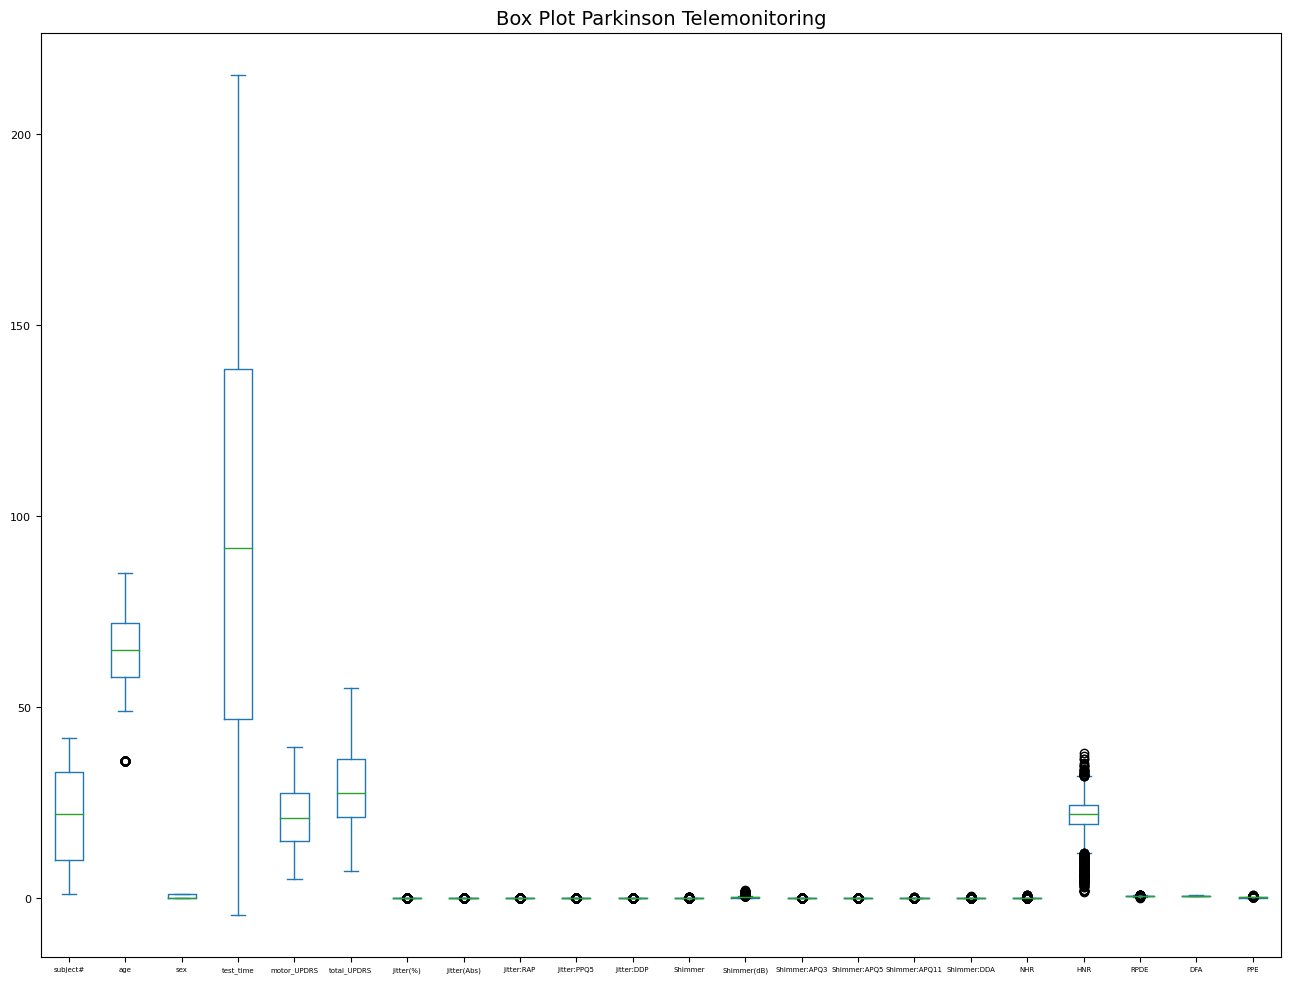

In [9]:
#Boxplot setiap atribut
plt.rc('axes', titlesize=14)
plt.rc('xtick', labelsize=5)
df.plot(figsize=(16, 12),kind='box')
plt.title('Box Plot Parkinson Telemonitoring')
plt.show()

In [10]:
#Hilangkan outlier
for column in df.columns:
    batas_bawah = -3 * df[column].std() + df[column].mean()
    batas_atas = 3 * df[column].std() + df[column].mean()

    df = df[(df[column] >= batas_bawah) & (df[column] <= batas_atas)]
df = df.reset_index(drop=True)


In [11]:
# Ukuran dataset setelah penghapusan outlier
df.shape

(4954, 22)

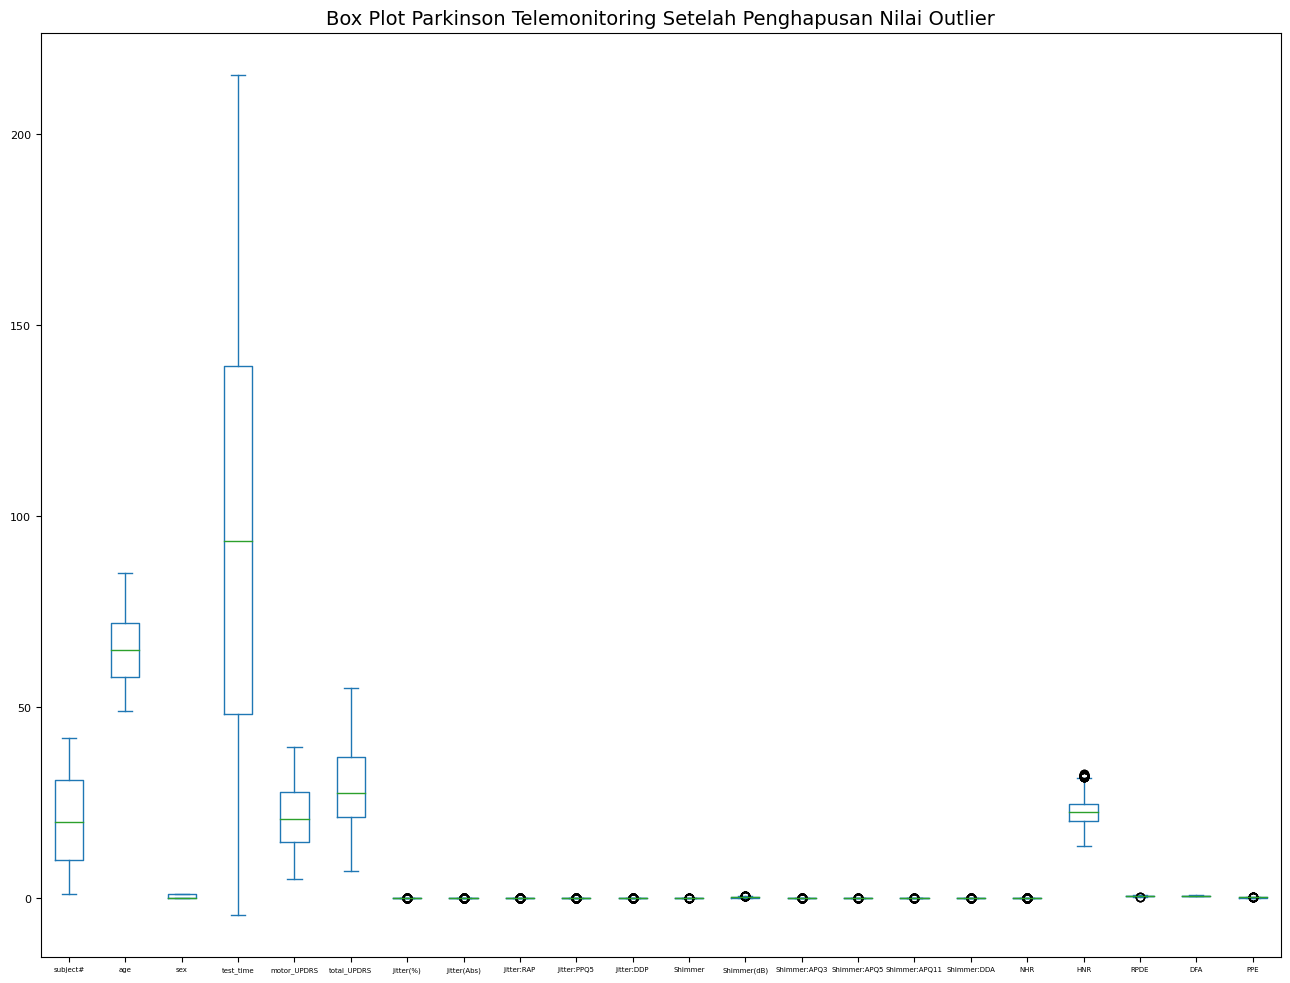

In [12]:
# Boxplot setelah penghapusan outlier
plt.rc('axes', titlesize=14)
plt.rc('xtick', labelsize=5)
df.plot(figsize=(16, 12),kind='box')
plt.title('Box Plot Parkinson Telemonitoring Setelah Penghapusan Nilai Outlier')
plt.show()

In [13]:
# Agregasi fitur
# Buat fitur baru Jitter_Mean
df['Jitter_Mean'] = df[['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP']].mean(axis=1)

# Buat fitur baru Shimmer_Mean
df['Shimmer_Mean'] = df[['Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA']].mean(axis=1)


In [14]:
df.corr()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Jitter_Mean,Shimmer_Mean
subject#,1.000000,0.025690,0.222330,0.016671,0.241861,0.260504,0.105737,0.010205,0.101440,0.088970,...,-0.002471,0.068740,-0.013436,0.074001,-0.132897,0.105567,0.145183,0.108382,0.102633,0.007128
age,0.025690,1.000000,0.049982,0.014025,0.223130,0.261264,0.139444,0.067409,0.106873,0.128534,...,0.228164,0.284105,0.214564,0.163249,-0.159215,0.117747,-0.169778,0.160735,0.121146,0.256589
sex,0.222330,0.049982,1.000000,0.013578,-0.028033,-0.084876,-0.143796,-0.405805,-0.019625,-0.150466,...,-0.174560,-0.214490,-0.127876,-0.114686,0.160896,-0.262441,-0.099373,-0.238468,-0.074729,-0.169839
test_time,0.016671,0.014025,0.013578,1.000000,0.076590,0.078434,-0.005237,-0.009625,-0.026985,-0.005657,...,-0.022041,-0.023289,-0.017987,-0.026640,0.037552,-0.035411,0.010578,-0.007877,-0.018310,-0.017603
motor_UPDRS,0.241861,0.223130,-0.028033,0.076590,1.000000,0.946839,0.073669,-0.014145,0.056284,0.069015,...,0.063014,0.120001,0.053755,0.081897,-0.129129,0.102478,-0.168119,0.123261,0.063946,0.085941
total_UPDRS,0.260504,0.261264,-0.084876,0.078434,0.946839,1.000000,0.087006,0.046414,0.068206,0.080298,...,0.089863,0.136636,0.078527,0.097062,-0.163006,0.147141,-0.158991,0.140310,0.076537,0.107655
Jitter(%),0.105737,0.139444,-0.143796,-0.005237,0.073669,0.087006,1.000000,0.871880,0.935423,0.946273,...,0.479926,0.504858,0.467215,0.681100,-0.651887,0.432029,0.450796,0.794060,0.973692,0.526450
Jitter(Abs),0.010205,0.067409,-0.405805,-0.009625,-0.014145,0.046414,0.871880,1.000000,0.758539,0.843356,...,0.456324,0.491293,0.416546,0.617090,-0.650273,0.548653,0.482178,0.744705,0.818434,0.474669
Jitter:RAP,0.101440,0.106873,-0.019625,-0.026985,0.056284,0.068206,0.935423,0.758539,1.000000,0.918678,...,0.464490,0.440438,0.484307,0.629329,-0.607452,0.330049,0.414794,0.681442,0.989733,0.504965
Jitter:PPQ5,0.088970,0.128534,-0.150466,-0.005657,0.069015,0.080298,0.946273,0.843356,0.918678,1.000000,...,0.531733,0.541938,0.510997,0.623671,-0.686199,0.403889,0.498702,0.790537,0.956668,0.560733


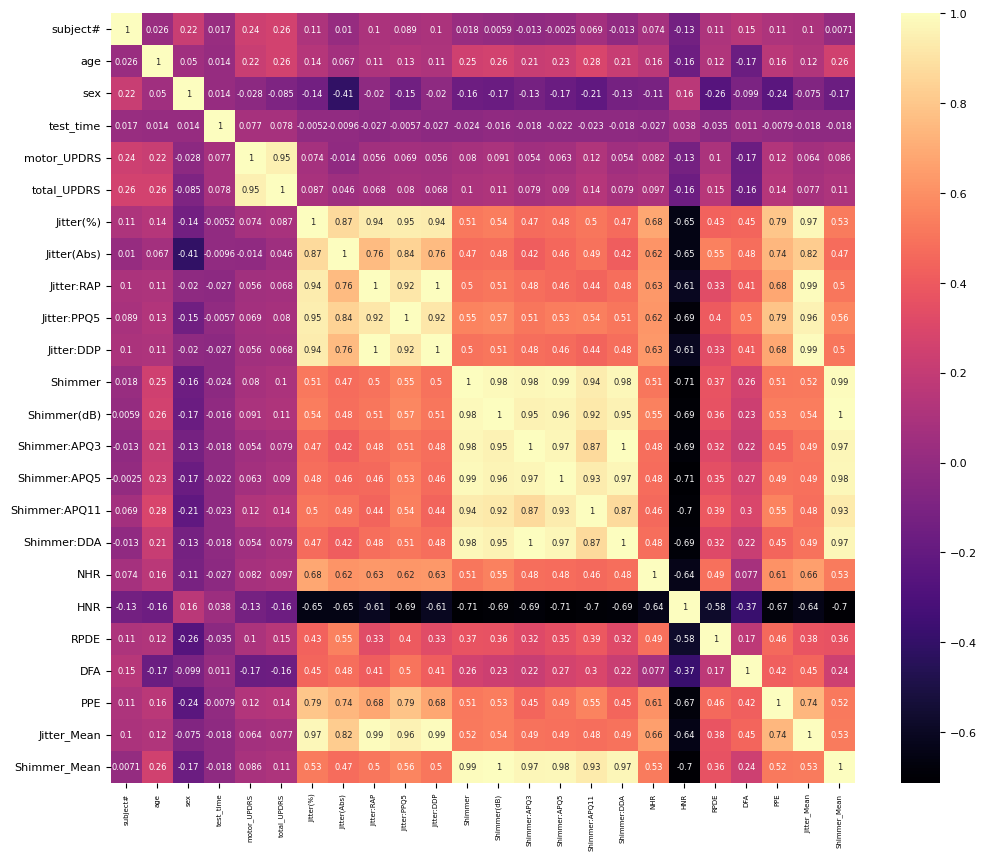

In [15]:
#Heatmap Korelasi
import seaborn as sns

plt.rc('font', size=6)
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='magma')
plt.show()

In [16]:
# Cek nilai korelasi terhadap target
df.corrwith(df["total_UPDRS"]).sort_values(ascending=False)

total_UPDRS      1.000000
motor_UPDRS      0.946839
age              0.261264
subject#         0.260504
RPDE             0.147141
PPE              0.140310
Shimmer:APQ11    0.136636
Shimmer(dB)      0.112064
Shimmer_Mean     0.107655
Shimmer          0.102308
NHR              0.097062
Shimmer:APQ5     0.089863
Jitter(%)        0.087006
Jitter:PPQ5      0.080298
Shimmer:DDA      0.078527
Shimmer:APQ3     0.078524
test_time        0.078434
Jitter_Mean      0.076537
Jitter:DDP       0.068256
Jitter:RAP       0.068206
Jitter(Abs)      0.046414
sex             -0.084876
DFA             -0.158991
HNR             -0.163006
dtype: float64

In [17]:
#Feature selection berdasarkan korelasi
selected_columns = ['age', 'Jitter(%)', 'Shimmer:APQ11', 'Shimmer(dB)','NHR', 'HNR', 'RPDE', 'DFA', 'PPE', 'sex', 'total_UPDRS', 'motor_UPDRS']
df = df[selected_columns]

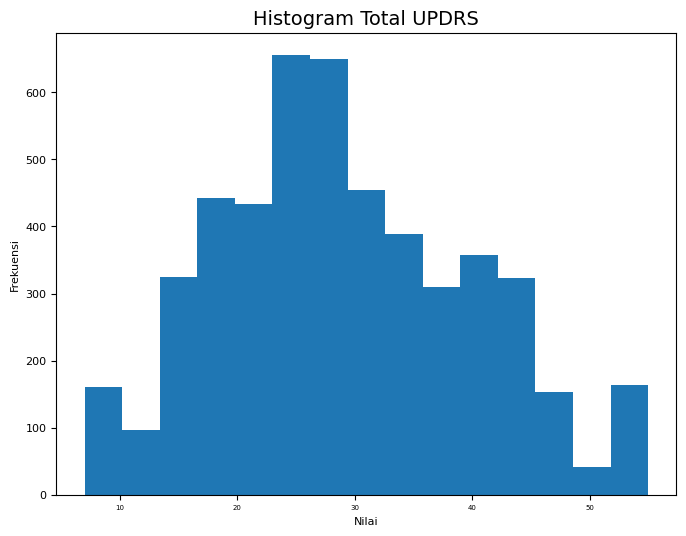

In [18]:
# Sebaran data dari data target
plt.figure(figsize=(8, 6))
plt.title('Histogram Total UPDRS')
plt.hist(df["total_UPDRS"], bins=15)
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

In [19]:
#Pisahkan data dengan target
y = df["total_UPDRS"]
X = df.drop(["motor_UPDRS", "total_UPDRS"],axis=1)

In [20]:
#Data Scaling
from sklearn.preprocessing import StandardScaler

#Simpan value dari kolom sex agar ketika di scalling bisa dipulihkan
sex = df["sex"]

X_scaled = StandardScaler().fit_transform(X)

#Pulihkan atribut sex
for i in range(len(X_scaled)):
  X_scaled[i][8]=sex[i]

In [21]:
#Split data menjadi data train, data validation, dan data test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

#### Ringkasan Metode
Metode yang digunakan dalam regresi ini adalah *Artificial Neural Network* (ANN). *Artificial Neural Network* adalah model yang terinspirasi dari jarangan saraf biologis yang tersusun dari neuron buatan berupa fungsi matematis sederhana. Model terseebut terdiri dari tiga set peraturan sederhana yakni perkalian, penjumlahan, dan aktivasi (Krenker et al., 2011).

Model ANN pada proyek ini dibuat menggunakan tensorflow. Model yang dibuat terdiri dari lima skema, yang masing-masing dieksplorasi menggunakan hyperparameter yang berbeda. Model pertama dibuat dengan satu hidden layer, model ke-2 hingga ke-3 dibuat dengan menggunakan 2 hidden layer, model ke-4 menggunakan 4 hidden layer, dan model terakhir dibuat dengan 10 hidden layer. Tujuan dari pembuatan lima skema model ini adalah untuk menemukan model yang memetakan fitur-fitur data ke target dengan baik.

Untuk training, epoch akan dilakukan sebanyak 500 dengan menerapakan teknik early stopping. Loss yang dihitung untuk setiap epoch dihitung berdasarkan nilai mean squared error (MSE). Bobot untuk epoch pertama kali diinisialisasi dengan RandomNormal dengan rata-rata 0 dan standar deviasi 0.5. Optimizer yang akan digunakan adalah Adam, dan pada beberapa model diterapkan regularisasi untuk mencegah overfitting mengingat data yang terbilang kecil.

Setelah pelatihan, model akan dievaluasi menggunakan *mean squared error* (MSE), *root mean squared error* (RMSE), dan *R2 score*. MSE menghitung rata-rata dari selisih perbedaan nilai prediksi dengan nilai sebenarnya dikuadratkan. RMSE adalah akar kuadrat dari MSE. R2 adalah koefisien determinasi yang menggambarkan sejauh mana hubungan antara data sebenarnya dengan model prediksi.







In [22]:
import tensorflow as tf

In [23]:
#Baseline model
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
model1.add(tf.keras.layers.Dense(50, activation='tanh',  kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.5), use_bias=True))
model1.add(tf.keras.layers.Dense(1, activation='linear'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model1.compile(optimizer=optimizer, loss='mean_squared_error')
history1 = model1.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), batch_size=10, callbacks=[callback])

Epoch 1/500
357/357 [==============================] - 1s 2ms/step - loss: 109.7646 - val_loss: 81.2070
Epoch 2/500
357/357 [==============================] - 1s 3ms/step - loss: 74.2975 - val_loss: 83.4468
Epoch 3/500
357/357 [==============================] - 1s 2ms/step - loss: 65.0551 - val_loss: 71.7916
Epoch 4/500
357/357 [==============================] - 1s 2ms/step - loss: 62.2094 - val_loss: 69.4007
Epoch 5/500
357/357 [==============================] - 1s 2ms/step - loss: 60.2447 - val_loss: 74.3600
Epoch 6/500
357/357 [==============================] - 1s 2ms/step - loss: 57.3948 - val_loss: 63.5180
Epoch 7/500
357/357 [==============================] - 0s 1ms/step - loss: 58.1723 - val_loss: 61.9729
Epoch 8/500
357/357 [==============================] - 0s 1ms/step - loss: 50.6699 - val_loss: 55.5625
Epoch 9/500
357/357 [==============================] - 0s 1ms/step - loss: 47.4305 - val_loss: 60.0590
Epoch 10/500
357/357 [==============================] - 0s 1ms/step - lo

In [24]:
#Eksplorasi Model 2
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
model2.add(tf.keras.layers.Dense(65, activation='tanh', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.5), use_bias=True))
model2.add(tf.keras.layers.Dense(35, activation='tanh', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.5), use_bias=True))
model2.add(tf.keras.layers.Dense(1, activation='linear'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model2.compile(optimizer=optimizer, loss='mean_squared_error')
history2 = model2.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), batch_size=40, callbacks=[callback])

Epoch 1/500
90/90 [==============================] - 1s 2ms/step - loss: 385.7389 - val_loss: 105.2412
Epoch 2/500
90/90 [==============================] - 0s 1ms/step - loss: 96.5655 - val_loss: 91.3486
Epoch 3/500
90/90 [==============================] - 0s 2ms/step - loss: 84.6189 - val_loss: 83.6879
Epoch 4/500
90/90 [==============================] - 0s 2ms/step - loss: 74.1050 - val_loss: 77.1454
Epoch 5/500
90/90 [==============================] - 0s 2ms/step - loss: 66.1313 - val_loss: 70.2612
Epoch 6/500
90/90 [==============================] - 0s 2ms/step - loss: 60.8972 - val_loss: 66.0304
Epoch 7/500
90/90 [==============================] - 0s 1ms/step - loss: 51.9891 - val_loss: 59.9789
Epoch 8/500
90/90 [==============================] - 0s 2ms/step - loss: 48.8717 - val_loss: 54.6027
Epoch 9/500
90/90 [==============================] - 0s 2ms/step - loss: 44.4641 - val_loss: 51.2176
Epoch 10/500
90/90 [==============================] - 0s 1ms/step - loss: 43.5063 - val_l

In [25]:
#Eksplorasi model 3
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

model3.add(tf.keras.layers.Dense(65, activation='tanh',  kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.5), kernel_regularizer=tf.keras.regularizers.l1(0.025)))
model3.add(tf.keras.layers.Dense(35, activation='tanh',  kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.5), kernel_regularizer=tf.keras.regularizers.l1(0.025)))
model3.add(tf.keras.layers.Dense(1, activation='linear'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model3.compile(optimizer=optimizer, loss='mean_squared_error')
history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=50, callbacks=[callback])

Epoch 1/500
72/72 [==============================] - 1s 3ms/step - loss: 470.6528 - val_loss: 141.3491
Epoch 2/500
72/72 [==============================] - 0s 2ms/step - loss: 125.2594 - val_loss: 116.2958
Epoch 3/500
72/72 [==============================] - 0s 1ms/step - loss: 108.8288 - val_loss: 107.2204
Epoch 4/500
72/72 [==============================] - 0s 2ms/step - loss: 98.4706 - val_loss: 99.4308
Epoch 5/500
72/72 [==============================] - 0s 2ms/step - loss: 90.8440 - val_loss: 91.7692
Epoch 6/500
72/72 [==============================] - 0s 2ms/step - loss: 83.2733 - val_loss: 89.4485
Epoch 7/500
72/72 [==============================] - 0s 2ms/step - loss: 78.1208 - val_loss: 83.5173
Epoch 8/500
72/72 [==============================] - 0s 2ms/step - loss: 71.9164 - val_loss: 77.6922
Epoch 9/500
72/72 [==============================] - 0s 2ms/step - loss: 67.6605 - val_loss: 77.8945
Epoch 10/500
72/72 [==============================] - 0s 2ms/step - loss: 64.1924 - v

In [26]:
#Eksplorasi model 4
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
model4.add(tf.keras.layers.Dense(120, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.5), kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model4.add(tf.keras.layers.Dense(80, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.5), kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model4.add(tf.keras.layers.Dense(40, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.5), kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model4.add(tf.keras.layers.Dense(20, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.5), kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model4.add(tf.keras.layers.Dense(1, activation='linear'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model4.compile(optimizer=optimizer, loss='mean_squared_error')
history4 = model4.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), batch_size=45, callbacks=[callback])

Epoch 1/500
80/80 [==============================] - 1s 3ms/step - loss: 227.3243 - val_loss: 139.9303
Epoch 2/500
80/80 [==============================] - 0s 2ms/step - loss: 128.5793 - val_loss: 130.0507
Epoch 3/500
80/80 [==============================] - 0s 2ms/step - loss: 117.2374 - val_loss: 123.0492
Epoch 4/500
80/80 [==============================] - 0s 2ms/step - loss: 108.5043 - val_loss: 119.0640
Epoch 5/500
80/80 [==============================] - 0s 2ms/step - loss: 105.2895 - val_loss: 117.6327
Epoch 6/500
80/80 [==============================] - 0s 2ms/step - loss: 99.8541 - val_loss: 111.7050
Epoch 7/500
80/80 [==============================] - 0s 2ms/step - loss: 98.6330 - val_loss: 103.9838
Epoch 8/500
80/80 [==============================] - 0s 2ms/step - loss: 93.8947 - val_loss: 115.0728
Epoch 9/500
80/80 [==============================] - 0s 2ms/step - loss: 92.2938 - val_loss: 102.7844
Epoch 10/500
80/80 [==============================] - 0s 2ms/step - loss: 90.

In [27]:
#Eksplorasi model 5
model5 = tf.keras.models.Sequential()
model5.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
neuron = 110

for i in range(10):
  model5.add(tf.keras.layers.Dense(neuron, activation='relu',  kernel_regularizer=tf.keras.regularizers.l1(0.01)))
  neuron = neuron - 10
model5.add(tf.keras.layers.Dense(1, activation='linear'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model5.compile(optimizer=optimizer, loss='mean_squared_error')
history5 = model5.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), batch_size=35, callbacks=[callback])

Epoch 1/500
102/102 [==============================] - 2s 4ms/step - loss: 167.0796 - val_loss: 113.1450
Epoch 2/500
102/102 [==============================] - 0s 2ms/step - loss: 100.0725 - val_loss: 84.5133
Epoch 3/500
102/102 [==============================] - 0s 2ms/step - loss: 85.9907 - val_loss: 104.2044
Epoch 4/500
102/102 [==============================] - 0s 2ms/step - loss: 84.1015 - val_loss: 93.2759
Epoch 5/500
102/102 [==============================] - 0s 2ms/step - loss: 74.5204 - val_loss: 84.3844
Epoch 6/500
102/102 [==============================] - 0s 2ms/step - loss: 68.4745 - val_loss: 79.9261
Epoch 7/500
102/102 [==============================] - 0s 2ms/step - loss: 68.2440 - val_loss: 68.1379
Epoch 8/500
102/102 [==============================] - 0s 2ms/step - loss: 63.2990 - val_loss: 62.4819
Epoch 9/500
102/102 [==============================] - 0s 2ms/step - loss: 58.4684 - val_loss: 66.2502
Epoch 10/500
102/102 [==============================] - 0s 2ms/step -

Evaluasi

In [28]:
#Fungsi evaluasi model yang menghitung mse, rmse, dan r2
from sklearn.metrics import mean_squared_error, r2_score

def evaluateModel(y_pred, y_true):
  mse = mean_squared_error(y_pred, y_true)
  r2 = r2_score(y_pred, y_true)
  print("Mean Squared Error:", mse)
  print("R-squared:", r2)
  print("RMSE", np.sqrt(mse))
  return mse,  np.sqrt(mse), r2,

In [29]:
#Ringkasan struktur model 1
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 601 (2.35 KB)
Trainable params: 601 (2.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
#Evaluasi model1 terhadap data training
y_train_pred1 = model1.predict(X_train)
evaluateModel(y_train_pred1, y_train)


112/112 [==============================] - 0s 914us/step
Mean Squared Error: 20.993369306826228
R-squared: 0.7776361121860546
RMSE 4.58185216990097


(20.993369306826228, 4.58185216990097, 0.7776361121860546)

In [31]:
#Evaluasi model1 terhadap data test
y_pred1 = model1.predict(X_test)
evaluateModel(y_pred1, y_test)

31/31 [==============================] - 0s 1ms/step
Mean Squared Error: 27.341405258324777
R-squared: 0.7019580362308717
RMSE 5.228900960844905


(27.341405258324777, 5.228900960844905, 0.7019580362308717)

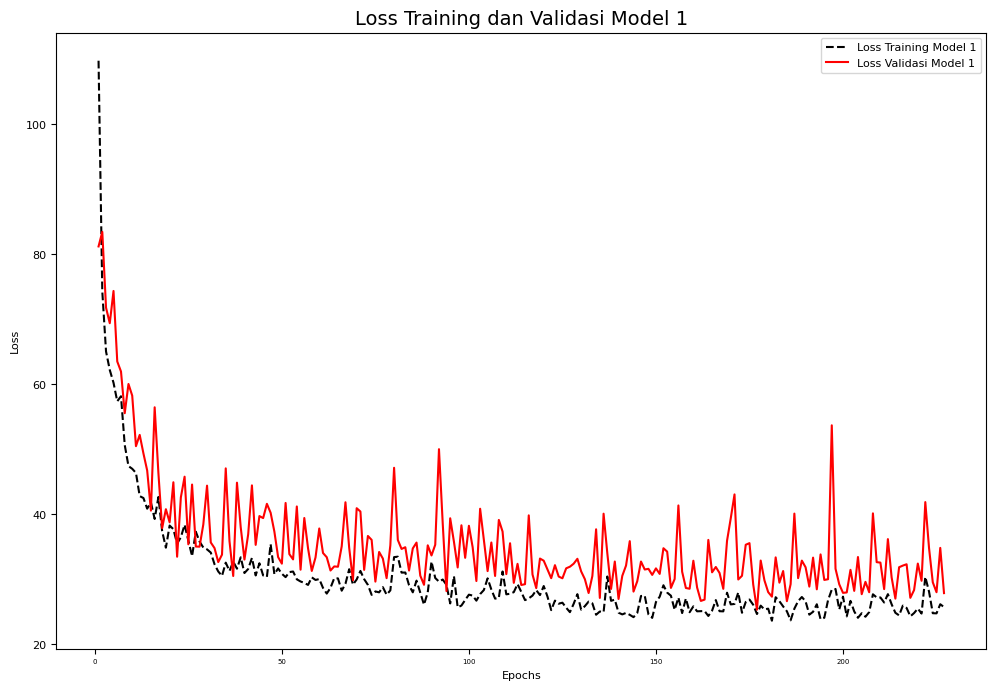

In [32]:
#Plot loss training dan validasi model 1
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(epochs, loss, 'k--', label='Loss Training Model 1')
plt.plot(epochs, val_loss, 'r', label='Loss Validasi Model 1')
plt.title('Loss Training dan Validasi Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Text(0.5, 0, 'Data ke-i')

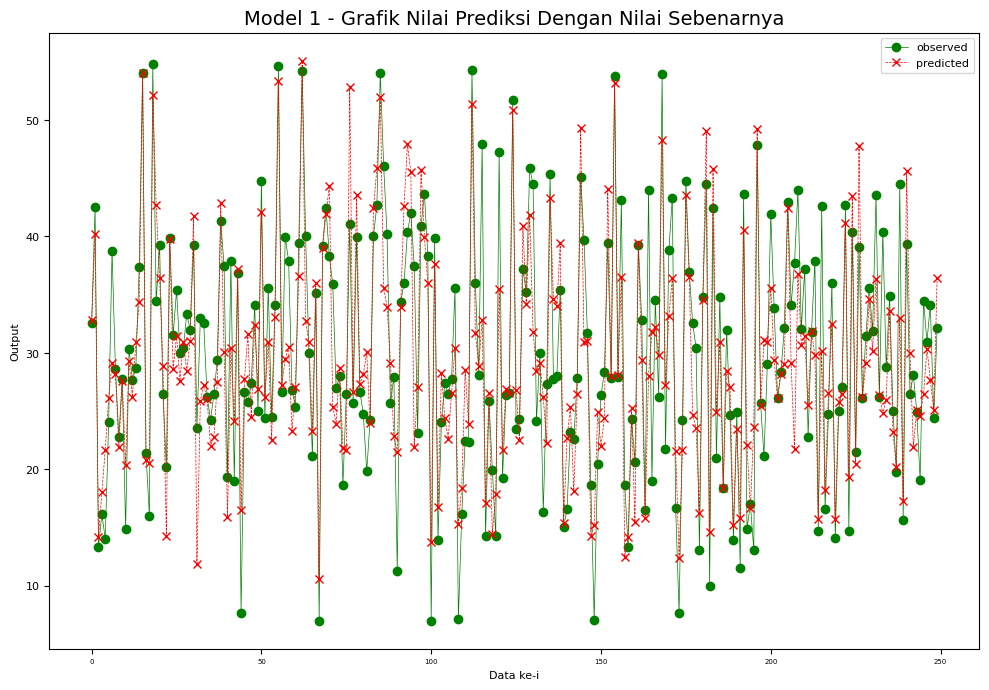

In [33]:
#Plot gambaran nilai prediksi dengan nilai sebenarnya (sample pada 250 data)
plt.title("Model 1 - Grafik Nilai Prediksi Dengan Nilai Sebenarnya")
plt.rcParams['figure.figsize'] = (24, 12)
plt.plot(range(250), y_test[:250], label = 'observed', color = 'g', linestyle ='-', linewidth=0.5, marker='o')
plt.plot(range(250), y_pred1[:250], label = 'predicted', color ='r', linestyle='--', linewidth=0.5, marker='x')
plt.legend()
plt.ylabel("Output")
plt.xlabel("Data ke-i")

In [34]:
#Ringkasan struktur model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 65)                715       
                                                                 
 dense_3 (Dense)             (None, 35)                2310      
                                                                 
 dense_4 (Dense)             (None, 1)                 36        
                                                                 
Total params: 3061 (11.96 KB)
Trainable params: 3061 (11.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
#Evaluasi model2 terhadap data training
y_train_pred2 = model2.predict(X_train)
evaluateModel(y_train_pred2, y_train)


112/112 [==============================] - 0s 1ms/step
Mean Squared Error: 14.216112258011252
R-squared: 0.8650637672964403
RMSE 3.7704260048449765


(14.216112258011252, 3.7704260048449765, 0.8650637672964403)

In [36]:
#Evaluasi model2 terhadap data test
y_pred2 = model2.predict(X_test)
evaluateModel(y_pred2, y_test)

31/31 [==============================] - 0s 966us/step
Mean Squared Error: 28.77062277060425
R-squared: 0.7151133218023733
RMSE 5.363825385916683


(28.77062277060425, 5.363825385916683, 0.7151133218023733)

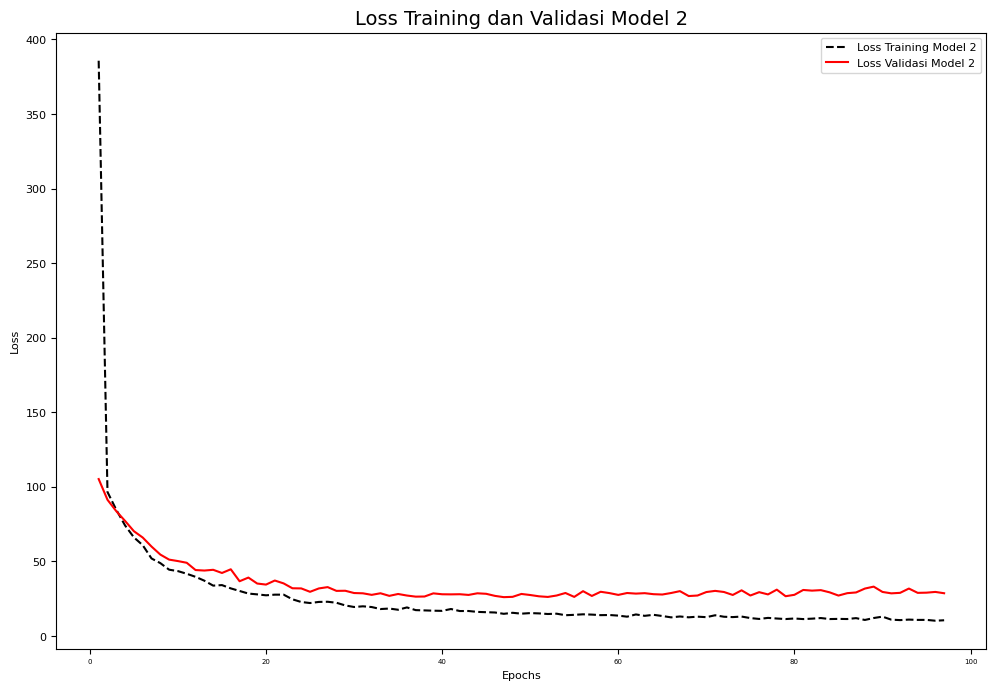

In [37]:
#Grafik loss training dan validasi
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(epochs, loss, 'k--', label='Loss Training Model 2')
plt.plot(epochs, val_loss, 'r', label='Loss Validasi Model 2')
plt.title('Loss Training dan Validasi Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Text(0.5, 0, 'Data ke-i')

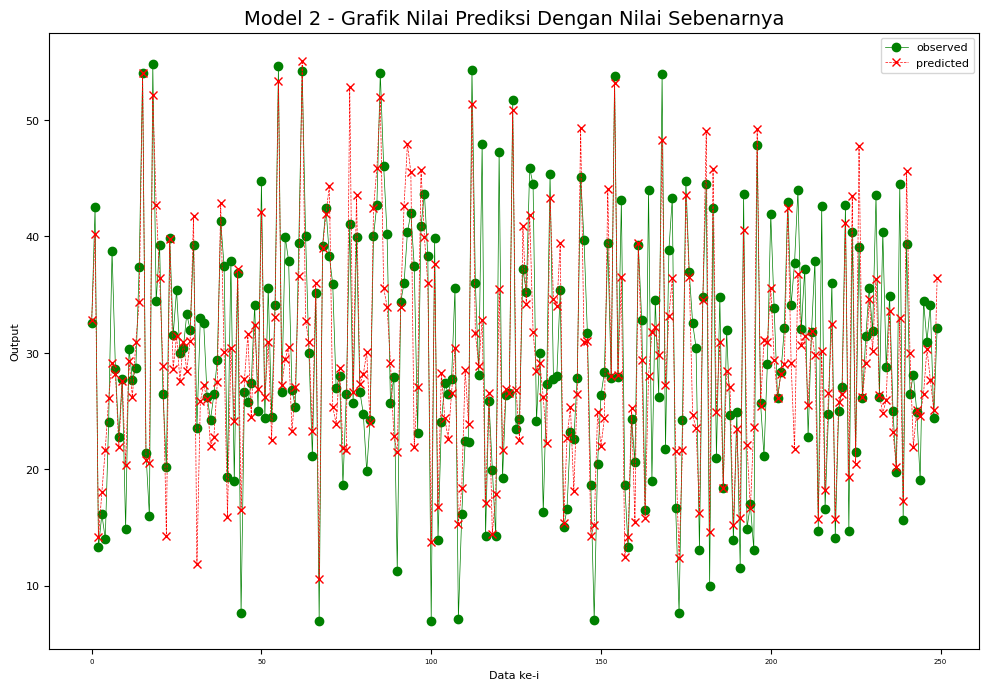

In [38]:
#Plot nilai prediksi dengan nilai sebenarnya (sample 250 data)
plt.title("Model 2 - Grafik Nilai Prediksi Dengan Nilai Sebenarnya")
plt.rcParams['figure.figsize'] = (24, 12)
plt.plot(range(250), y_test[:250], label = 'observed', color = 'g', linestyle ='-', linewidth=0.5, marker='o')
plt.plot(range(250), y_pred1[:250], label = 'predicted', color ='r', linestyle='--', linewidth=0.5, marker='x')
plt.legend()
plt.ylabel("Output")
plt.xlabel("Data ke-i")

In [39]:
#Ringkasan struktur model3
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 65)                715       
                                                                 
 dense_6 (Dense)             (None, 35)                2310      
                                                                 
 dense_7 (Dense)             (None, 1)                 36        
                                                                 
Total params: 3061 (11.96 KB)
Trainable params: 3061 (11.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
#Evaluasi model3 terhadap data training
y_train_pred3 = model3.predict(X_train)
evaluateModel(y_train_pred3, y_train)

112/112 [==============================] - 0s 987us/step
Mean Squared Error: 12.1149092032101
R-squared: 0.8872239298021478
RMSE 3.480647813728085


(12.1149092032101, 3.480647813728085, 0.8872239298021478)

In [41]:
#Evaluasi model3 terhadap data training
y_pred3 = model3.predict(X_test)
evaluateModel(y_pred3, y_test)

31/31 [==============================] - 0s 909us/step
Mean Squared Error: 16.302916857725776
R-squared: 0.8416453029444293
RMSE 4.037687067830515


(16.302916857725776, 4.037687067830515, 0.8416453029444293)

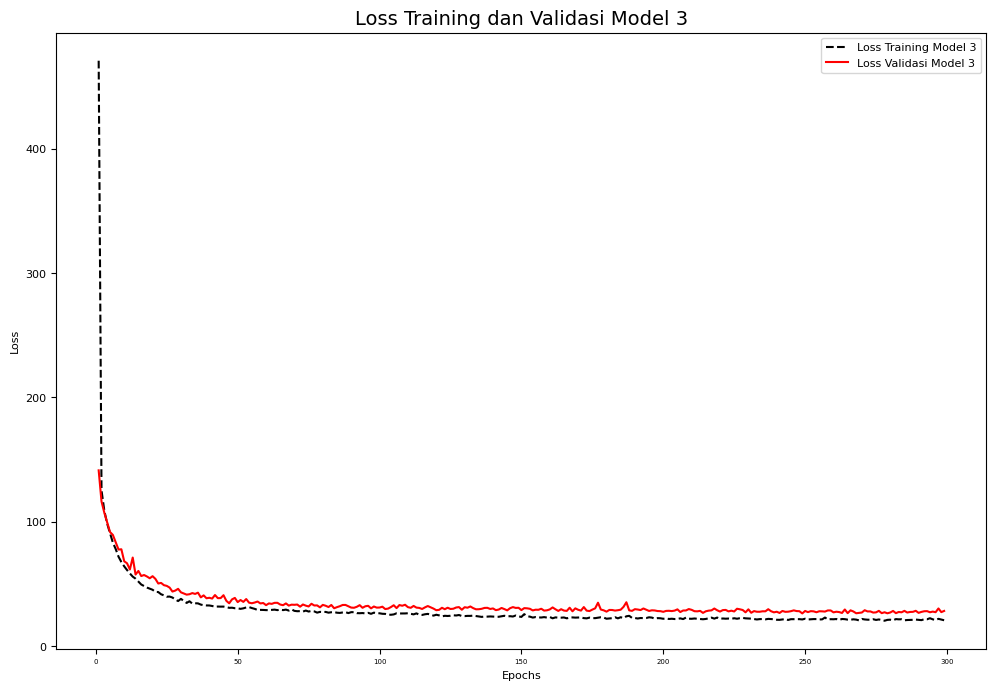

In [42]:
#Plot loss training dan validasi Model 3
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(epochs, loss, 'k--', label='Loss Training Model 3')
plt.plot(epochs, val_loss, 'r', label='Loss Validasi Model 3')
plt.title('Loss Training dan Validasi Model 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Text(0.5, 0, 'Data ke-i')

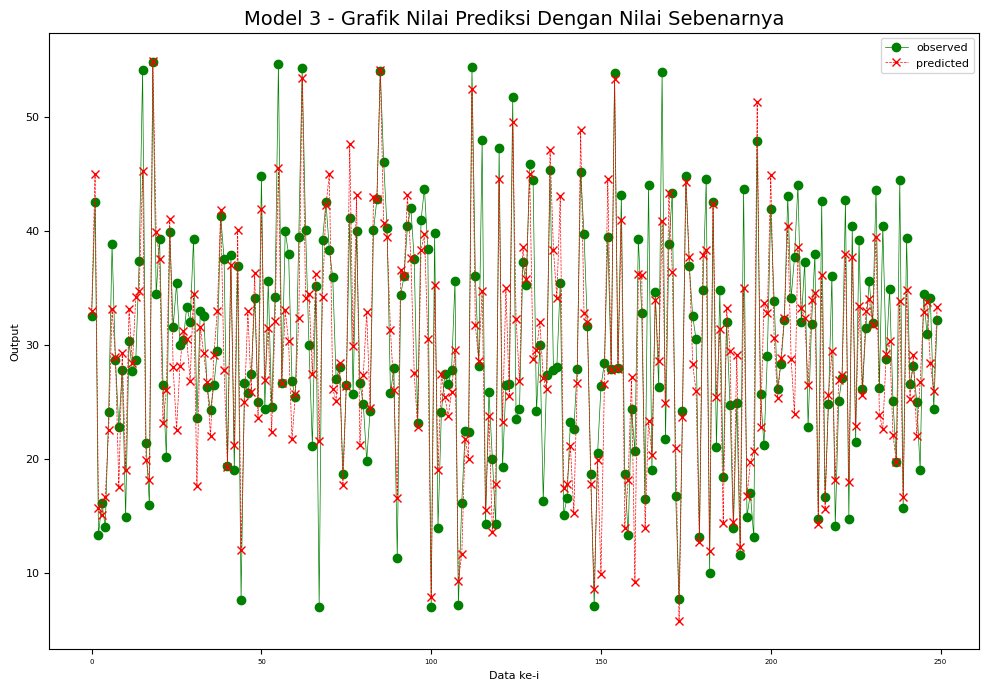

In [43]:
#Plot nilai prediksi dan nilai sebenarnya pada model 3 (sample 250 data)
plt.title("Model 3 - Grafik Nilai Prediksi Dengan Nilai Sebenarnya")
plt.rcParams['figure.figsize'] = (24, 12)

plt.plot(range(250), y_test[:250], label = 'observed', color = 'g', linestyle ='-', linewidth=0.5, marker='o')
plt.plot(range(250), y_pred2[:250], label = 'predicted', color ='r', linestyle='--', linewidth=0.5, marker='x')
plt.legend()
plt.ylabel("Output")
plt.xlabel("Data ke-i")

In [44]:
#Ringkasan struktur model4
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 120)               1320      
                                                                 
 dense_9 (Dense)             (None, 80)                9680      
                                                                 
 dense_10 (Dense)            (None, 40)                3240      
                                                                 
 dense_11 (Dense)            (None, 20)                820       
                                                                 
 dense_12 (Dense)            (None, 1)                 21        
                                                                 
Total params: 15081 (58.91 KB)
Trainable params: 15081 (58.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
#Evaluasi model4 terhadap data training
y_train_pred4 = model4.predict(X_train)
evaluateModel(y_train_pred4, y_train)

112/112 [==============================] - 0s 1ms/step
Mean Squared Error: 9.09439220935046
R-squared: 0.9163298418147819
RMSE 3.0156910003099555


(9.09439220935046, 3.0156910003099555, 0.9163298418147819)

In [46]:
#Evaluasi model4 terhadap data test
y_pred4 = model4.predict(X_test)
evaluateModel(y_pred4, y_test)

31/31 [==============================] - 0s 1ms/step
Mean Squared Error: 14.845907133809384
R-squared: 0.8545424272137214
RMSE 3.8530386883354004


(14.845907133809384, 3.8530386883354004, 0.8545424272137214)

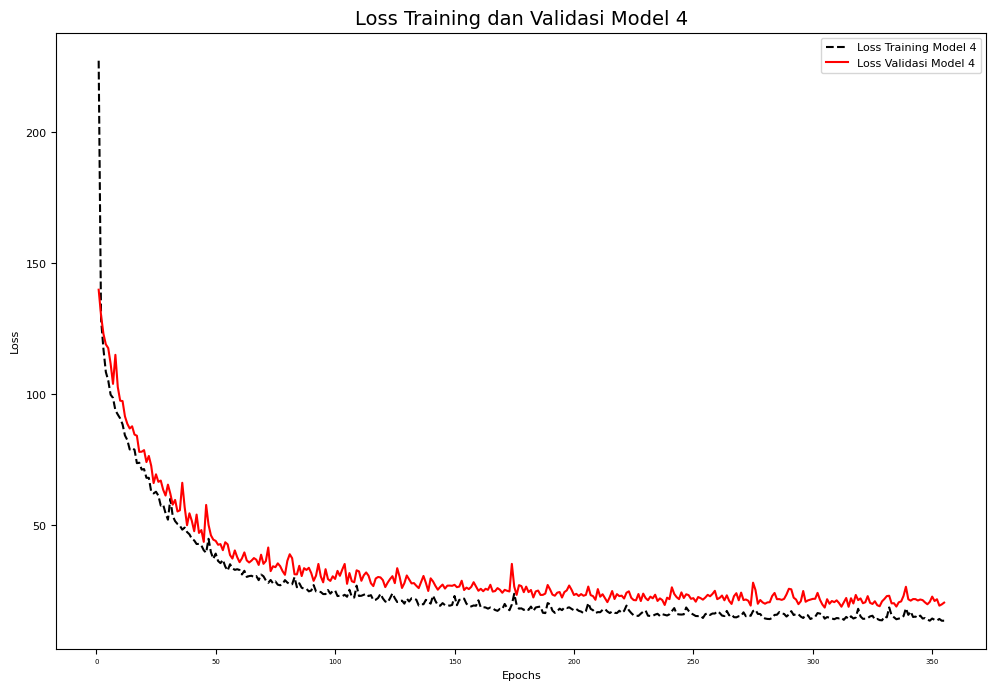

In [47]:
#Plot loss training dan validasi model 4
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(epochs, loss, 'k--', label='Loss Training Model 4')
plt.plot(epochs, val_loss, 'r', label='Loss Validasi Model 4')
plt.title('Loss Training dan Validasi Model 4')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Text(0.5, 0, 'Data ke-i')

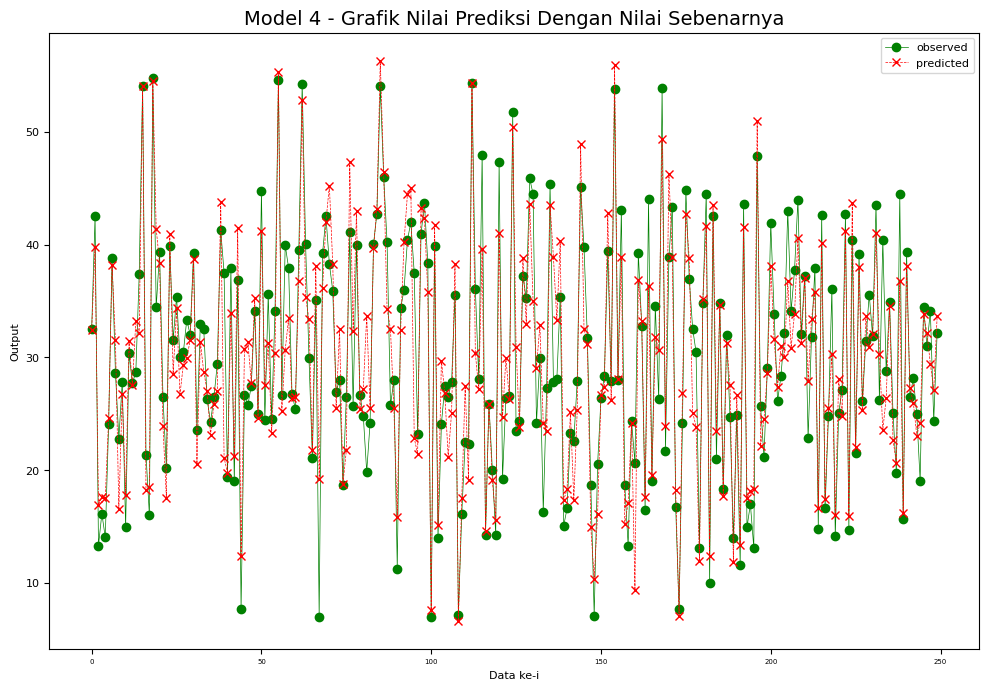

In [48]:
#Plot nilai prediksi dan nilai sebenarnya pada model 4
plt.title("Model 4 - Grafik Nilai Prediksi Dengan Nilai Sebenarnya")
plt.rcParams['figure.figsize'] = (24, 12)
plt.plot(range(250), y_test[:250], label = 'observed', color = 'g', linestyle ='-', linewidth=0.5, marker='o')
plt.plot(range(250), y_pred3[:250], label = 'predicted', color ='r', linestyle='--', linewidth=0.5, marker='x')
plt.legend()
plt.ylabel("Output")
plt.xlabel("Data ke-i")

In [49]:
#Ringkasan struktur model
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 110)               1210      
                                                                 
 dense_14 (Dense)            (None, 100)               11100     
                                                                 
 dense_15 (Dense)            (None, 90)                9090      
                                                                 
 dense_16 (Dense)            (None, 80)                7280      
                                                                 
 dense_17 (Dense)            (None, 70)                5670      
                                                                 
 dense_18 (Dense)            (None, 60)                4260      
                                                                 
 dense_19 (Dense)            (None, 50)               

In [50]:
#Evaluasi model4 terhadap data training
y_pred5 = model5.predict(X_train)
evaluateModel(y_pred5, y_train)

112/112 [==============================] - 0s 1ms/step
Mean Squared Error: 11.195004751400822
R-squared: 0.8825431361363681
RMSE 3.3458937148990286


(11.195004751400822, 3.3458937148990286, 0.8825431361363681)

In [51]:
#Evaluasi model5 terhadap data test
y_pred5 = model5.predict(X_test)
evaluateModel(y_pred5, y_test)

31/31 [==============================] - 0s 1ms/step
Mean Squared Error: 14.231918443579104
R-squared: 0.8443776722376403
RMSE 3.7725214967683227


(14.231918443579104, 3.7725214967683227, 0.8443776722376403)

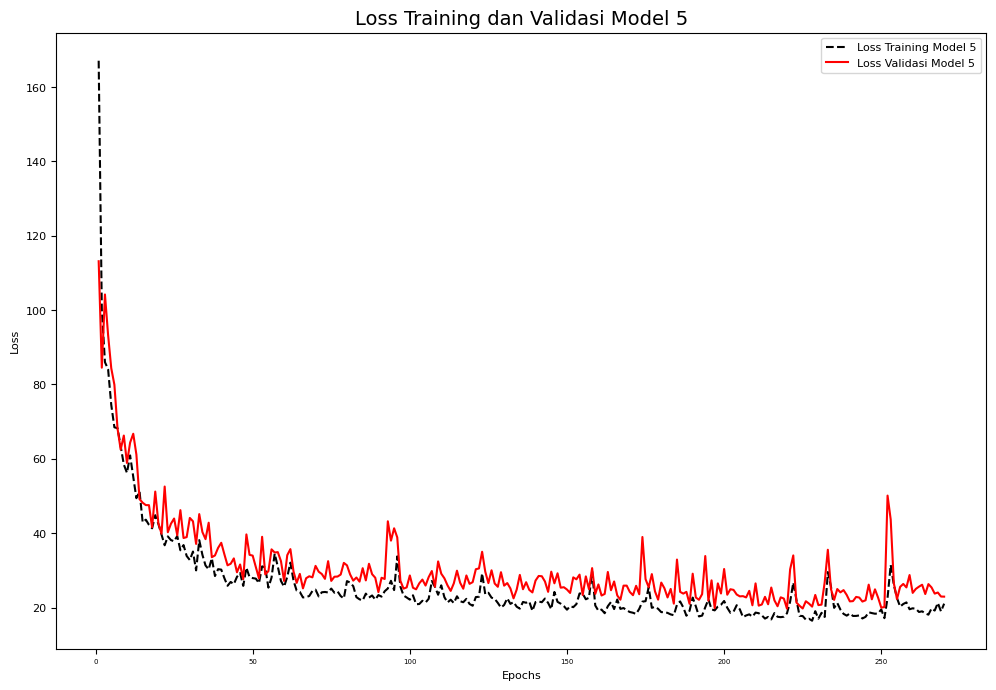

In [52]:
#Plot loss training dan validasi model 5
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(epochs, loss, 'k--', label='Loss Training Model 5')
plt.plot(epochs, val_loss, 'r', label='Loss Validasi Model 5')
plt.title('Loss Training dan Validasi Model 5')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Text(0.5, 0, 'Data ke-i')

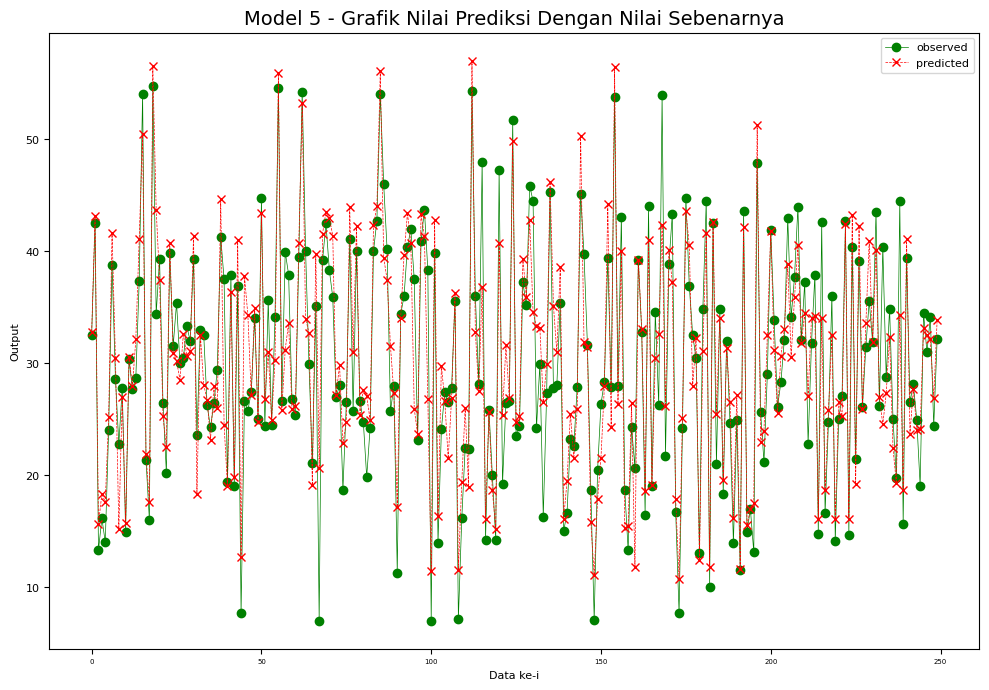

In [53]:
#Plot Nilai Prediksi Dengan Nilai Sebenarnya pada model 5
plt.title("Model 5 - Grafik Nilai Prediksi Dengan Nilai Sebenarnya")
plt.rcParams['figure.figsize'] = (24, 12)
plt.plot(range(250), y_test[:250], label = 'observed', color = 'g', linestyle ='-', linewidth=0.5, marker='o')
plt.plot(range(250), y_pred4[:250], label = 'predicted', color ='r', linestyle='--', linewidth=0.5, marker='x')
plt.legend()
plt.ylabel("Output")
plt.xlabel("Data ke-i")

### Hasil dan Analisis
Dari percobaan sebelumnya diperoleh lima hasil dari masing-masing skema model sebagai berikut.

> Pada model pertama, model dibuat dengan satu hidden layer yang terdiri dari 50 perceptrons. Model tersebut diaktivasi dengan fungsi aktivasi tanh dan menggunakan optimizer Adam dengan learning rate 0.1. Jumlah epoch yang dilakukan adalah 500 dengan diberlakukan early stopping dengan epoch akan diberhentikan lebih awal jika 50 epoch berikutnya tidak ada peningkatan. Dari 5 kali running program diperoleh MSE (RMSE) untuk memprediksi data trainning sebesar 19.22 (4.38), 20.25 (4.5), 21.4 (4.62), 20.63 (4.54), dan 20.97 (4.58), dengan nilai rata-rata 20.5 (4.5) dan nilai R2 sebesar 0.81, 0.8, 0.78, 0.79, dan 0.77, dengan rata-rata 0.79. Sedangkan untuk data test diperoleh hasil MSE sebesar 21.45 (4.63), 25.6 (5.1), 29.6 (5.43), 25.76 (5.07), dan 25.28 (5.02), dengan rata-rata 25.54 (5.05), untuk nilai R2 yang diperoleh di masing-masing penjalanan program sebesar 0.78, 0.74, 0.68, 0.74, dan 0.72, dengan rata-rata 0.73.

> Pada model kedua, model dibuat dengan dua hidden layer dengan hidden layer pertama terdiri dari 65 neuron dan hidden layer kedua terdiri dari 35 neuron. Model tersebut diaktivasi dengan fungsi aktivasi tanh dan menggunakan optimizer Adam dengan learning rate 0.01. Jumlah epoch yang dilakukan adalah 500 dengan diberlakukan early stopping dengan epoch akan diberhentikan lebih awal jika 50 epoch berikutnya tidak ada peningkatan. Dari 5 kali running program diperoleh MSE (RMSE) untuk memprediksi data trainning sebesar 10.1 (3.18), 10.5 (3.24), 11.8 (3.44), 11.72 (3.42), dan 10.47 (3.23), dengan nilai rata-rata 10.92 (3.3)  dan nilai sebesar R2 0.9, 0.9, 0.88, 0.88, dan 0.89, dengan rata-rata 0.89. Sedangkan untuk data test diperoleh hasil MSE sebesar 28.9 (5.38), 33.2 (5.76), 26.55 (5.15), 27.45 (5.24), dan 27.43 (5.23), dengan rata-rata 28.7 (5.35), untuk nilai R2 yang diperoleh di masing-masing penjalanan program sebesar 0.72, 0.66, 0.73, 0.7, dan 0.71, dengan rata-rata 0.7.

> Pada model ketiga, model dibuat dengan dua hidden layer hidden layer dengan pertama terdiri dari 65 neuron dan hidden layer kedua terdiri dari 35 neuron. Model tersebut diaktivasi dengan fungsi aktivasi tanh, menggunakan regulariasi lasso sebesar 0.01, dan menggunakan optimizer Adam dengan learning rate 0.01. Jumlah epoch yang dilakukan adalah 500 dengan diberlakukan early stopping dengan epoch akan diberhentikan lebih awal jika 50 epoch berikutnya tidak ada peningkatan. Dari 5 kali running program diperoleh MSE (RMSE) untuk memprediksi data trainning sebesar 12.87 (3.58), 11.14 (3.34), 12.1 (3.47), 11.3 (3.36), dan 11.38 (3.38), dengan nilai rata-rata sebesar 11.76 (3.43) dan nilai R2 sebesar 0.87, 0.89, 0.88, 0.89, dan 0.89 dengan rata-rata 0.88. Sedangkan untuk data test diperoleh hasil MSE sebesar 17.1 (4.14), 14.5 (3.8), 16.6 (4.1), 16.5 (4.07), dan 16.65 (4.08), dengan rata-rata 16.3 (4.03), untuk nilai R2 yang diperoleh di masing-masing penjalanan program sebesar 0.82, 0.82, 0.84, 0.83, dan 0.83, dengan rata-rata 0.83.

> Pada model keempat, model dibuat dengan empat hidden layer dengan pertama terdiri dari 120 neuron, hidden layer kedua terdiri dari 80 neuron, hidden layer ketiga terdiri dari 40 neuron, dan hidden layer keempat terdiri dari 20 neuron. Model tersebut diaktivasi dengan fungsi aktivasi relu dan menggunakan optimizer Adam dengan learning rate 0.01. Jumlah epoch yang dilakukan adalah 500 dengan diberlakukan early stopping dengan epoch akan diberhentikan lebih awal jika 50 epoch berikutnya tidak ada peningkatan. Dari 5 kali running program diperoleh MSE (RMSE) untuk memprediksi data trainning sebesar 9.32 (3.05), 10.37 (3.22), 9.86 (3.14), 10.36 (3.22), dan 11.74 (3.43), dengan nilai rata-rata 10.3 (3.2) dan nilai R2 sebesar 0.91, 0.9, 0.9, 0.9, dan 0.88 dengan rata-rata 0.89. Sedangkan untuk data test diperoleh hasil MSE sebesar 12.32 (3.51), 17.1 (4.13), 14.85 (3.85), 14.1 (3.75), dan 19.58 (4.43), dengan rata-rata 15.6 (3.9), untuk nilai R2 yang diperoleh di masing-masing penjalanan program sebesar 0.87, 0.83, 0.84, 0.86, dan 0.8, dengan rata-rata 0.84.

> Pada model kelima, model dibuat dengan sepuluh hidden layer dengan hidden layer pertama terdiri dari 110 neuron dan hidden layer berikutnya berkurang 10 dari hidden layer sebelumnya. Model tersebut diaktivasi dengan fungsi aktivasi relu dengan regularisasi lasso 0.01, dan menggunakan optimizer Adam dengan learning rate 0.01. Jumlah epoch yang dilakukan adalah 500 dengan diberlakukan early stopping dengan epoch akan diberhentikan lebih awal jika 50 epoch berikutnya tidak ada peningkatan. Dari 5 kali running program diperoleh MSE (RMSE) untuk memprediksi data trainning sebesar 11.8 (3.43), 12.3 (3.5), 12.94 (3.6), 14.1 (3.75), dan 12.7 (3.57), dengan nilai rata-rata 12.7 (3.57) dan nilai R2 sebesar 0.89, 0.88, 0.87, 0.87, dan 0.86 dengan rata-rata 0.87. Sedangkan untuk data test diperoleh hasil MSE sebesar 16.73 (4.1), 18.44 (4.3), 18.8 (4.34), 18 (4.24), dan 20.97 (4.58), dengan rata-rata 18.6 (4.3), untuk nilai R2 yang diperoleh di masing-masing penjalanan program sebesar 0.84, 0.83, 0.8, 0.81, dan 0.77, dengan rata-rata 0.81.

**Ringkasan Hasil**
<html>
<table>
  <tr>
    <th>Model</th>
    <th> MSE Trainning </th>
    <th> RMSE Trainning </th>
    <th> R2 Trainning </th>
    <th>MSE Test</th>
    <th>RMSE Test</th>
    <th>R2 Test </th>
  </tr>
  <tr>
    <td>Model 1    </td>
    <td>20.5</td>
    <td>4.5</td>
    <td>0.79</td>
    <td>25.54</td>
    <td>5.05</td>
    <td>0.73</td>
  </tr>
  <tr>
    <td>Model 2    </td>
    <td>10.92</td>
    <td>3.3</td>
    <td>0.89</td>
    <td>28.7</td>
    <td>5.35</td>
    <td>0.70</td>
  </tr>
   <tr>
    <td>Model 3    </td>
    <td>11.76</td>
    <td>3.43</td>
    <td>0.88</td>
    <td>16.3</td>
    <td>4.03</td>
    <td>0.83</td>
  </tr>
   <tr>
    <td>Model 4    </td>
    <td>10.3</td>
    <td>3.20</td>
    <td>0.89</td>
    <td>15.6</td>
    <td>3.9</td>
    <td>0.84</td>
  </tr>
   <tr>
    <td>Model 5    </td>
    <td>12.7</td>
    <td>3.57</td>
    <td>0.87</td>
    <td>18.6</td>
    <td>4.3</td>
    <td>0.81</td>
  </tr>
</table>
</html>


**Analisis**

Pada model pertama yang hanya menggunakan 1 hidden layer, terlihat bahwa model sudah cukup, namun belum terlalu baik dalam memahami data, dengan R2 Score sebesar 0.73 terhadap data test. Karena jumlah layer dan neuron yang sedikit, model 1 ini menggunakan learning rate yang lebih besar dibandingkan 4 model lainnya. Dari grafik trainning loss dan validation loss, terlihat bahwa nilai validation loss tidak stabil sehingga diperlukan perbaikan pada model seperti penambahan neuron atau layer pada model untuk meningkatkan kecocokan model terhadap data.

Pada model kedua, jumlah layer ditingkatkan menjadi dua hidden layer. Model dapat memahami data dengan jauh lebih baik pada data pelatihan, terlihat dari hasil pelatihan yang mendapatkan R2 score sebesar 0.88, akan tetapi model tidak dapat memprediksi data dengan baik pada data test, dengan R2 sebesar 0.71. Pada grafik trainning loss dan validation loss juga terlihat bahwa ada ruang diantara dua garis, dimana trainning loss terus menurun sedangkan validation loss cenderung tetap. Model kedua tersebut terlihat sedikit overfitting karena terdapat kesenjangan yang cukup signifikan dari hasil evaluasi terhadap data training dibandingkan hasil yang didapatkan pada data test.

Pada model ketiga, merupakan perbaikan dari model kedua dengan menerapkan regularisasi untuk mengurangi overfitting seperti yang terjadi pada model kedua. Hasil menunjukkan bahwa overfitting dari model ke-2 berkurang dengan meningkatkan nilai R2 juga menurunkan nilai MSE dibandingkan model ke-2. Model ke-3 ini juga merupakan model kedua terbaik yang diperoleh dari 5 model yang dibuat. Dari grafik juga terlihat bahwa training loss dan validation loss sama-sama menurun secara stabil. Pada model kedua dan ketiga, fungsi aktivasi yang digunakan adalah tanh sehingga output berada dalam rentang [-1, 1] cocok dengan data setelah hasil scalling yang terdiri dari nilai negatif dan positif, karena tidak menghilangkan nilai negatif.

Pada model ke-4 model keempat memberikan hasil yang lebih baik dari model-model lainnya. Hal ini dikarenakan jumlah hidden layer yang cukup sesuai dengan jumlah neuron di masing-masing layer juga sesuai untuk data yang digunakan. Dengan meningkatnya jumlah layer dan neuron, model akan dapat lebih baik dalam memahami data. Pada model ke-5 dengan digunakan sepuluh hidden layer model tidak memberikan hasil evaluasi yang lebih baik dari model lainnya. Hal ini dikarenakan terlalu banyak neuron dan hidden layer yang digunakan menjadikan model menjadi kompleks, kurang sesuai dengan data yang digunakan yang terbilang terlalu sedikit. Fungsi aktivasi yang digunakan untuk model ke-4 adalah relu. Hasil percobaan untuk model 4 dan 5, relu lebih memberikan hasil yang baik dibandingkan tanh. Hal ini dikarenakan jumlah layer yang lebih banyak dengan data negatif dan positif setelah scalling, membuat tanh dapat membuat gradien menjadi sangat kecil karena dalam rentang [-1, 1], sedangkan relu karena tidak meng-nolkan nilai negatif, nilai gradien akan tetap besar.

#### Kesimpulan
Artificial Neural Network dapat digunakan untuk memprediksi tingkat keparahan Parkinsons (total_UPDRS) berdasarkan data telemonitoring pasien. Dengan pra-pemrosesan penghapusan nilai outlier, feature selection, dan pensakalaan pada data diperoleh model dengan performa terbaik, yakni model 4 yang menggunakan empat hidden layer dengan jumleh neuron 120, 80, 40, dan 20 neuron, menggunakan optimizer adam dengan learning rate 0.01 dan menerapkan regularisasi lasso sebesar 0.01 di setiap hidden layer. Model tersebut menunjukkan performa evaluasi yang lebih bagus dalam memahami data dibandingkan dengan model lainnya pada dataset  Parkinson's telemontoring, dengan rata-rata MSE sebesar 18.6, RMSE 4.3, dan rata-rata R2 sebesar 0.84. Penggunaan fungsi aktivasi relu pada model 4 ini menghasilkan evaluasi yang lebih baik daripada tanh. Penggunaan layer dan neuron sangat penting dalam pembangunan model, model dengan layer dan neuron yang terlalu kecil atau terlalu besar dapat menurunkan performa model karena dapat membuat model tidak dapat memahami data dengan baik. Penggunaan regularisasi juga sangat diperlukan agar membuat model tidak overfitting seperti yang terjadi model 2. Jumlah layer, neuron, dan hyperparameter lain harus diperhatikan agar menghasilkan model yang dapat memprediksi nilai target dengan akurasi yang baik.



####Referensi

Andrej Krenker, Janez Bešter and Andrej Kos (2011). Introduction to the Artificial Neural Networks, Artificial
Neural Networks - Methodological Advances and Biomedical Applications, Prof. Kenji Suzuki (Ed.), ISBN: 978-
953-307-243-2, InTech, Available from: http://www.intechopen.com/books/artificial-neural-networksmethodological-advances-and-biomedical-applications/introduction-to-the-artificial-neural-networks

Chicco, D., Warrens, M. J., & Jurman, G. (2021). The coefficient of determination R-squared is more informative than SMAPE, MAE, MAPE, MSE and RMSE in regression analysis evaluation. PeerJ. Computer science, 7, e623. https://doi.org/10.7717/peerj-cs.623

National Institute of Aging. 2022. Parkinson's Disease: Causes, Symptoms, and Treatments. Available from https://www.nia.nih.gov/health/parkinsons-disease


Tsanas,Athanasios and Little,Max. (2009). Parkinsons Telemonitoring. UCI Machine Learning Repository. Available from :https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring


